<a href="https://colab.research.google.com/github/27ABH/AI-Data-Science-2025-26/blob/main/Copy_of_linear_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from google.colab import files

In [2]:
# Cell 2: Uploading the CSV
# Upload the CSV file
uploaded = files.upload()

# Get the filename of the uploaded file
filename = next(iter(uploaded))

# Read the CSV file
data = pd.read_csv(filename)

Saving student_habits_performance.csv to student_habits_performance.csv


In [3]:
# Cell 3: # Extract features and target

# Retrieve the values required from the csv
x1 = data["study_hours_per_day"].values
x2 = data["sleep_hours"].values
y = data["exam_score"].values

# Normalize features
x1_mean, x1_std = x1.mean(), x1.std()
x2_mean, x2_std = x2.mean(), x2.std()
x1_normalized = (x1 - x1_mean) / x1_std
x2_normalized = (x2 - x2_mean) / x2_std

# Add a column of ones for the intercept term (theta0)
X = np.column_stack((np.ones(len(x1_normalized)), x1_normalized, x2_normalized))
y = y.reshape(-1, 1)

In [4]:
# Cell 4: Initializing and storing variables for usage

# Initialize parameters (theta0, theta1, theta2)
theta = np.zeros((3, 1))

# Hyperparameters
learning_rate = 0.01
epochs = 300

# Store initial values for printing
initial_theta = theta.copy()
initial_learning_rate = learning_rate
initial_epochs = epochs

# Compute initial cost
predictions = X.dot(theta)
cost = (1/(2*len(y))) * np.sum((predictions - y)**2)
initial_cost = cost

# Lists to store history for plotting
cost_history = []
theta_history = []

In [5]:
# Cell 5: Gradient Descent
for epoch in range(epochs):
    # Calculate predictions and error
    predictions = X.dot(theta)
    error = predictions - y

    # Compute gradients
    gradients = (1/len(y)) * X.T.dot(error)

    # Update parameters
    theta = theta - learning_rate * gradients

    # Compute and store cost
    current_cost = (1/(2*len(y))) * np.sum((X.dot(theta) - y)**2)
    cost_history.append(current_cost)
    theta_history.append(theta.copy())

# Convert histories to arrays for easier plotting
cost_history = np.array(cost_history)
theta_history = np.array(theta_history)

# Store final values
final_theta = theta
final_cost = cost_history[-1]

In [6]:
# Cell 6: Printing out required statistics

print("Starting values of the parameters:")
print(f"theta0: {initial_theta[0][0]:.4f}, theta1: {initial_theta[1][0]:.4f}, theta2: {initial_theta[2][0]:.4f}")
print("\nStarting values of the hyperparameters:")
print(f"Learning Rate: {initial_learning_rate}, Epochs: {initial_epochs}")
print(f"\nStarting value of the cost: {initial_cost:.4f}")
print("\nValues of the parameters at convergence:")
print(f"theta0: {final_theta[0][0]:.4f}, theta1: {final_theta[1][0]:.4f}, theta2: {final_theta[2][0]:.4f}")
print(f"\nFinal value of the cost: {final_cost:.4f}")

Starting values of the parameters:
theta0: 0.0000, theta1: 0.0000, theta2: 0.0000

Starting values of the hyperparameters:
Learning Rate: 0.01, Epochs: 300

Starting value of the cost: 2564.6536

Values of the parameters at convergence:
theta0: 66.1882, theta1: 13.3018, theta2: 2.2646

Final value of the cost: 48.5039


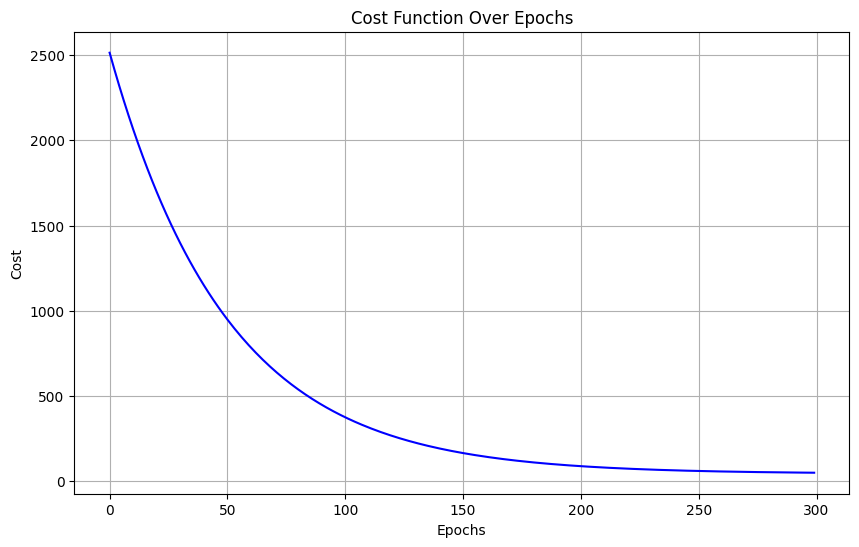

In [7]:
# Cell 7: Plot cost function over epochs

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), cost_history, color='blue')
plt.title('Cost Function Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

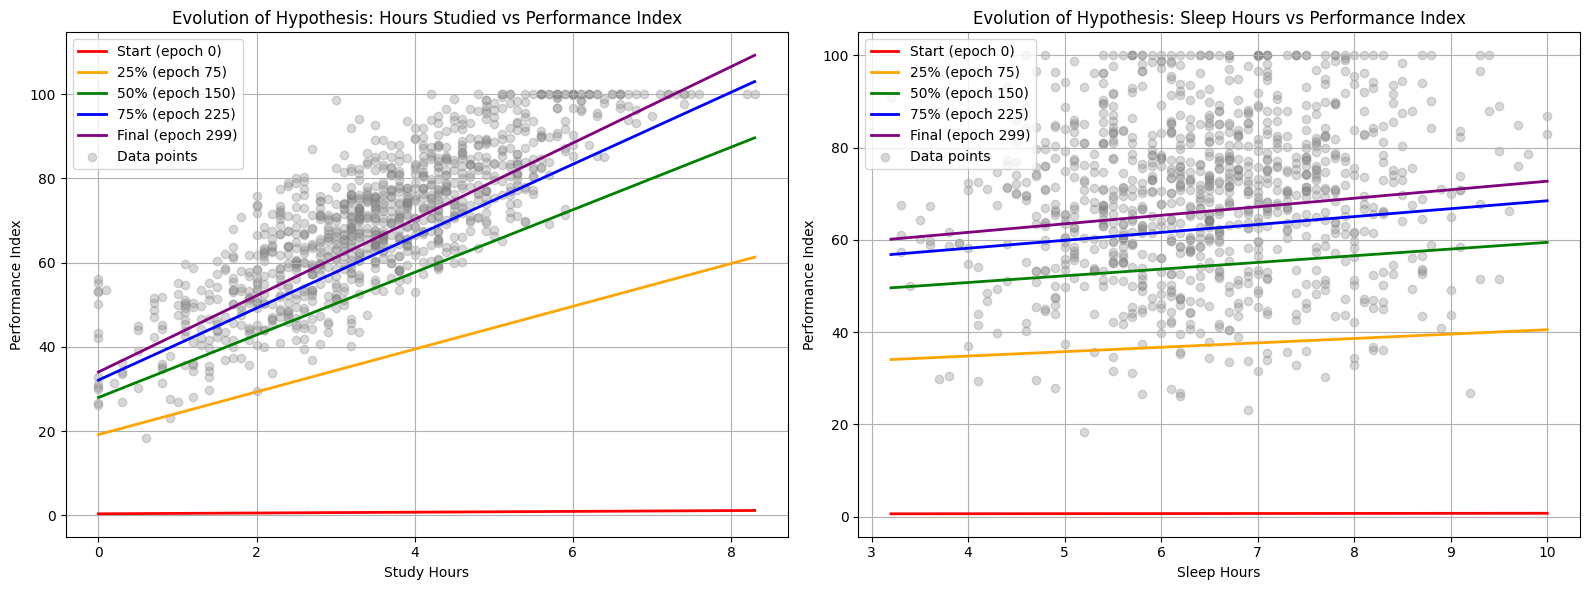

In [9]:
# Cell 8: Plot two 2d subplots to show how the hypothesis changes with respect to both hours studied and sleep hours

# Select key epochs to visualize (start, middle, and end)
epoch_indices = [0, len(theta_history)//4, len(theta_history)//2,
                3*len(theta_history)//4, len(theta_history)-1]
epoch_labels = ['Start', '25%', '50%', '75%', 'Final']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
colors = ['red', 'orange', 'green', 'blue', 'purple']

# Plot 1: Hours Studied vs Performance Index with evolving regression lines
x1_range = np.linspace(min(x1), max(x1), 100)

for i, epoch_idx in enumerate(epoch_indices):
    theta = theta_history[epoch_idx]

    # Normalize the x1_range using the same parameters
    x1_range_normalized = (x1_range - x1_mean) / x1_std

    # Calculate predictions using the parameters at this epoch
    # Set the other feature (Sleep Hours) to its mean for this visualization
    y_pred = theta[0] + theta[1] * x1_range_normalized + theta[2] * 0  # 0 is the normalized mean of x2

    ax1.plot(x1_range, y_pred, color=colors[i], linewidth=2,
             label=f'{epoch_labels[i]} (epoch {epoch_idx})')

ax1.scatter(x1, y, alpha=0.3, color='gray', label='Data points')
ax1.set_xlabel('Study Hours')
ax1.set_ylabel('Performance Index')
ax1.set_title('Evolution of Hypothesis: Hours Studied vs Performance Index')
ax1.legend()
ax1.grid(True)

# Plot 2: Sleep Hours vs Performance Index with evolving regression lines
x2_range = np.linspace(min(x2), max(x2), 100)

for i, epoch_idx in enumerate(epoch_indices):
    theta = theta_history[epoch_idx]

    # Normalize the x2_range using the same parameters
    x2_range_normalized = (x2_range - x2_mean) / x2_std

    # Calculate predictions using the parameters at this epoch
    # Set the other feature (Hours Studied) to its mean for this visualization
    y_pred = theta[0] + theta[1] * 0 + theta[2] * x2_range_normalized  # 0 is the normalized mean of x1

    ax2.plot(x2_range, y_pred, color=colors[i], linewidth=2,
             label=f'{epoch_labels[i]} (epoch {epoch_idx})')

ax2.scatter(x2, y, alpha=0.3, color='gray', label='Data points')
ax2.set_xlabel('Sleep Hours')
ax2.set_ylabel('Performance Index')
ax2.set_title('Evolution of Hypothesis: Sleep Hours vs Performance Index')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

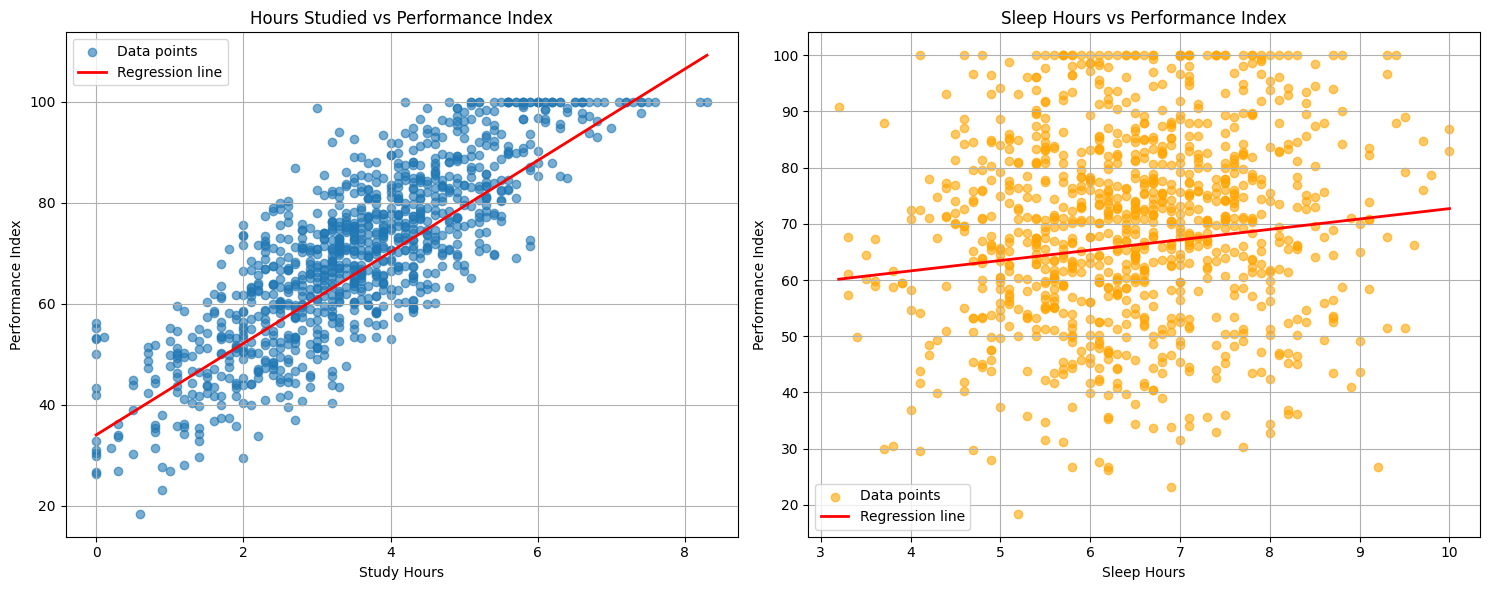

In [10]:
# Cell 9: Plot two 2d subplots to see how the final hypothesis fits the data with respect to both hours studied and sleep hours

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Hours Studied vs Performance Index with regression line
# Generate points for the regression line
x1_range = np.linspace(min(x1), max(x1), 100)
# Normalize these points using the same parameters
x1_range_normalized = (x1_range - x1_mean) / x1_std
# Calculate predictions using the learned parameters
# Note: We set the other feature (Sleep Hours) to its mean for this visualization
y_pred_x1 = final_theta[0] + final_theta[1] * x1_range_normalized + final_theta[2] * 0  # 0 is the normalized mean of x2

ax1.scatter(x1, y, alpha=0.6, label='Data points')
ax1.plot(x1_range, y_pred_x1, color='red', linewidth=2, label='Regression line')
ax1.set_xlabel('Study Hours')
ax1.set_ylabel('Performance Index')
ax1.set_title('Hours Studied vs Performance Index')
ax1.legend()
ax1.grid(True)

# Plot 2: Sleep Hours vs Performance Index with regression line
# Generate points for the regression line
x2_range = np.linspace(min(x2), max(x2), 100)
# Normalize these points using the same parameters
x2_range_normalized = (x2_range - x2_mean) / x2_std
# Calculate predictions using the learned parameters
# Note: Set the other feature (Hours Studied) to its mean for this visualization
y_pred_x2 = final_theta[0] + final_theta[1] * 0 + final_theta[2] * x2_range_normalized  # 0 is the normalized mean of x1

ax2.scatter(x2, y, alpha=0.6, color='orange', label='Data points')
ax2.plot(x2_range, y_pred_x2, color='red', linewidth=2, label='Regression line')
ax2.set_xlabel('Sleep Hours')
ax2.set_ylabel('Performance Index')
ax2.set_title('Sleep Hours vs Performance Index')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()